In [1]:
import numpy as np
import numpy as np
import numpy as np
import pandas as pd
import pandas as pd
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
# plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2_contingency, pearsonr

import statsmodels.api as sm
import joblib


In [2]:
def reload_df():
    return pd.read_csv('cleaned_data.csv')

def reload_df2():
    return pd.read_csv('cleaned_data2.csv')



reload_df()

,Time,Res_Freq,Amplitude,Phase,Sample_number,Peak,Before_compression,After_compression,Compression_ratio,Compression_time
0,163.800369,1869.660604,2.478,-90.53,1,0,14.60,11.8,1.237288,0
1,163.900374,1810.413956,2.884,-88.21,1,0,14.60,11.8,1.237288,0
2,164.000381,1771.481737,2.588,-84.06,1,0,14.60,11.8,1.237288,0
3,164.100386,1787.941833,1.152,54.81,1,0,14.60,11.8,1.237288,0
4,164.200392,1787.941833,1.152,54.81,1,0,14.60,11.8,1.237288,0
...,...,...,...,...,...,...,...,...,...,...
8456,464.702579,1452.402881,21.770,-5.22,12,0,14.82,11.8,1.255932,0
8457,110.949346,1449.131699,20.690,-6.79,2,0,14.50,11.8,1.228814,0
8458,220.249598,1450.229779,19.752,-6.63,2,0,14.50,11.8,1.228814,0
8459,733.499954,1452.952313,21.622,-5.18,12,0,14.82,11.8,1.255932,0


c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

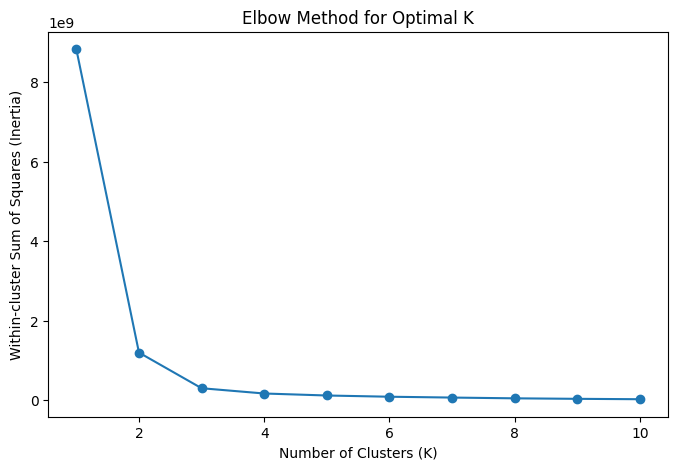

c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


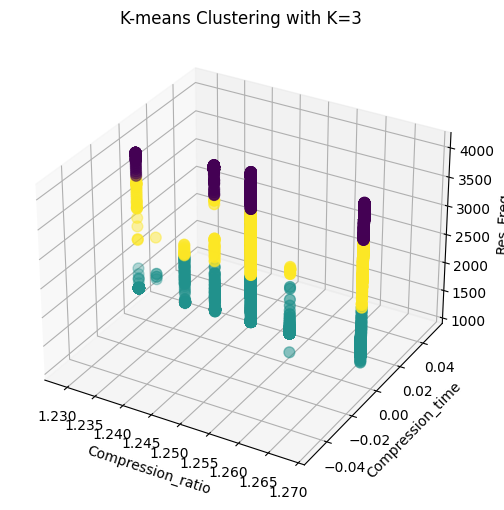

In [3]:
######### clustering :

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# what to plot 
plot_cols = ["Compression_ratio", "Compression_time", "Res_Freq"]
# Select the features for clustering
df = reload_df()    
X = df[plot_cols]

# Determine the optimal number of clusters using the "elbow method"
# In the elbow method, we plot the within-cluster sum of squares (inertia) for different values of K (number of clusters).
# The "elbow" point on the plot indicates the optimal K value where increasing K further doesn't provide significant reduction in inertia.
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow curve, you can select the optimal number of clusters, let's say K=3
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize the clusters in 3D space (you can modify this based on the number of features)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# using plot_cols scatter and
ax.scatter(df[plot_cols[0]], df[plot_cols[1]], df[plot_cols[2]], c=df['Cluster'], s=60)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
ax.set_zlabel(plot_cols[2])
plt.title('K-means Clustering with K=3')


plt.show()


Epoch 1/10
191/191 [==============================] - 1s 2ms/step - loss: 0.4139 - val_loss: 0.0577
Epoch 2/10
191/191 [==============================] - 0s 1ms/step - loss: 0.0363 - val_loss: 0.0158
Epoch 3/10
191/191 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 4/10
191/191 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 5/10
191/191 [==============================] - 0s 1ms/step - loss: 6.9831e-04 - val_loss: 4.7670e-04
Epoch 6/10
191/191 [==============================] - 0s 1ms/step - loss: 3.5776e-04 - val_loss: 2.7013e-04
Epoch 7/10
191/191 [==============================] - 0s 1ms/step - loss: 2.1751e-04 - val_loss: 1.8191e-04
Epoch 8/10
191/191 [==============================] - 0s 1ms/step - loss: 1.5578e-04 - val_loss: 1.4432e-04
Epoch 9/10
191/191 [==============================] - 0s 1ms/step - loss: 1.2889e-04 - val_loss: 1.3186e-04
Epoch 10/10
53/53 [==============================] - 0s 789u

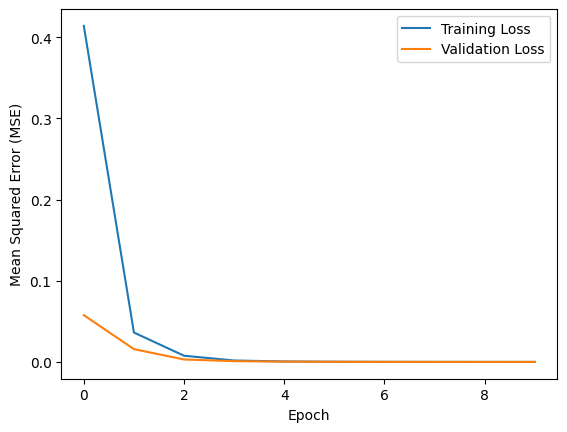

53/53 [==============================] - 0s 703us/step


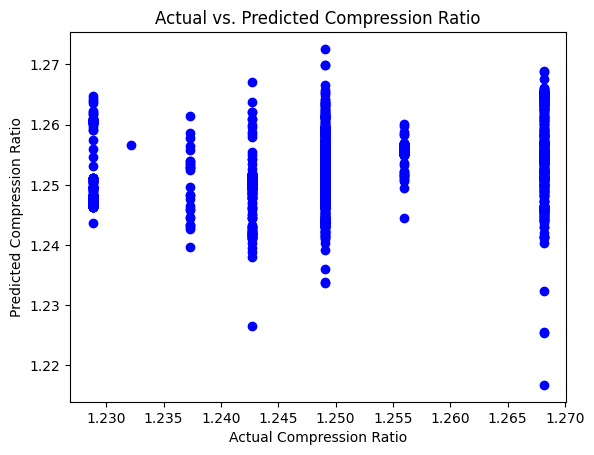

In [4]:

# Extract the features "Res_Freq" and "Amplitude"
df = reload_df()
X = df[["Res_Freq", "Amplitude"]].values

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Assuming you have a target variable for the neural network (e.g., "Compression_time" or any other target variable you want to predict)
y = df["Compression_ratio"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),  # 2 input nodes for "Res_Freq" and "Amplitude"
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 nodes
    tf.keras.layers.Dense(1)  # Output node for the target variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values with different colors for actual and predicted values
plt.scatter(y_test, y_pred, c=['blue'])
plt.xlabel('Actual Compression Ratio')
plt.ylabel('Predicted Compression Ratio')
plt.title('Actual vs. Predicted Compression Ratio')
plt.show()

Mean Squared Error: 4.930380657631324e-32
R-squared: 1.0


Text(0.5, 1.0, 'Actual vs Predicted values for Linear Regression')

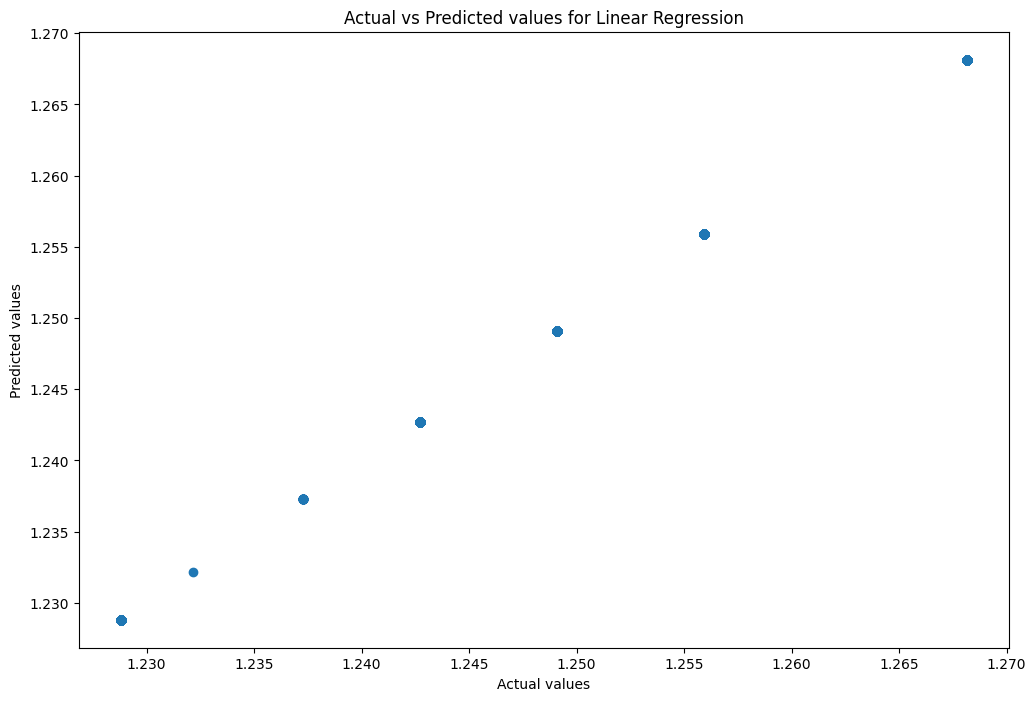

In [5]:

# Extract the features "Res_Freq", "Amplitude", and "compression_ratio"
df = reload_df()
X = df[["Res_Freq", "Amplitude", "Compression_ratio"]]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data of the linear regression model
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")

plt.ylabel("Predicted values")

plt.title("Actual vs Predicted values for Linear Regression")

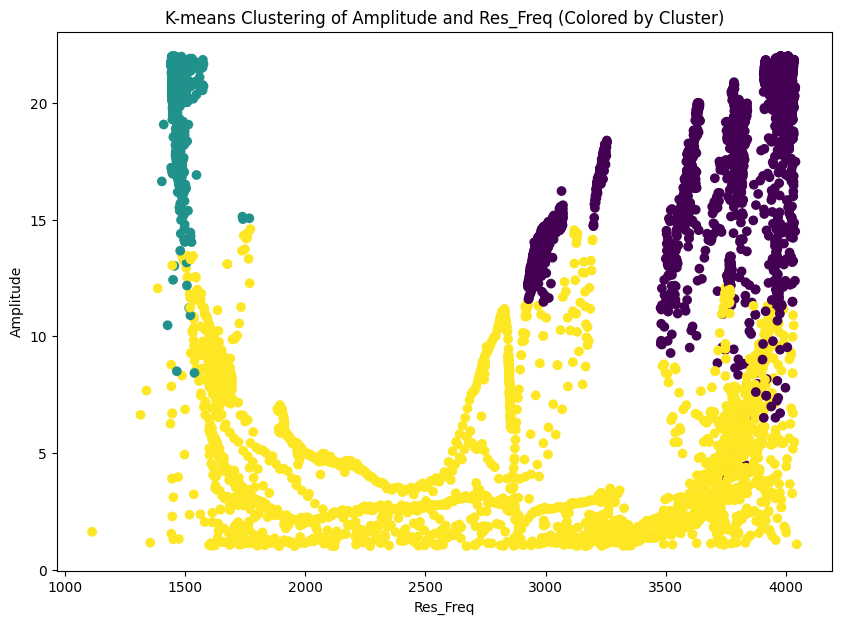

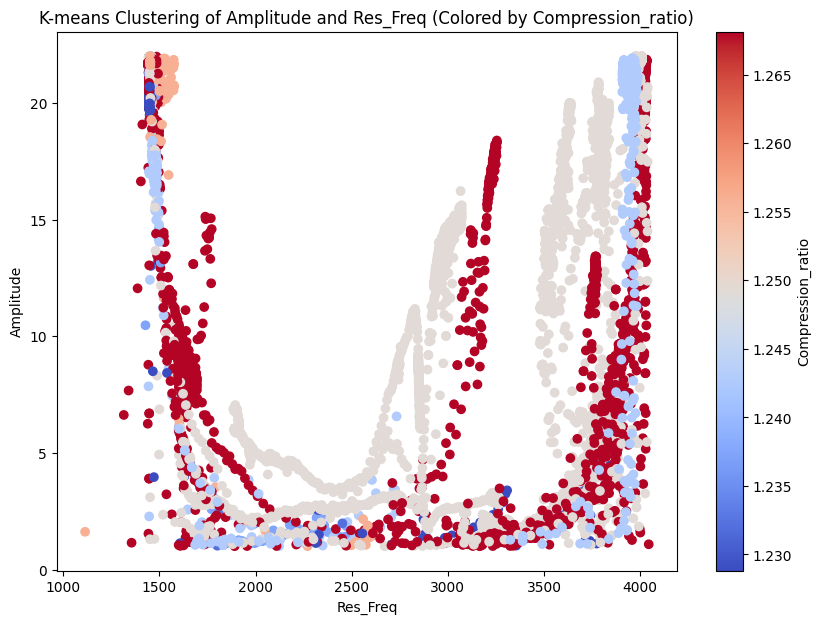

In [6]:

# Select the features for clustering
selected_features = ["Amplitude", "Res_Freq", "Compression_ratio"]
X = df[selected_features]

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with K=3 (you can choose the appropriate K based on your data)
kmeans = KMeans(n_clusters=3, random_state=55,  n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X['Res_Freq'], X['Amplitude'], c=clusters, cmap='viridis')
plt.xlabel('Res_Freq')
plt.ylabel('Amplitude')
plt.title('K-means Clustering of Amplitude and Res_Freq (Colored by Cluster)')
plt.show()

# Visualize the clusters with respect to Compression_ratio
plt.figure(figsize=(10, 7))
plt.scatter(X['Res_Freq'], X['Amplitude'], c=df['Compression_ratio'], cmap='coolwarm')
plt.xlabel('Res_Freq')
plt.ylabel('Amplitude')
plt.colorbar(label='Compression_ratio')
plt.title('K-means Clustering of Amplitude and Res_Freq (Colored by Compression_ratio)')
plt.show()



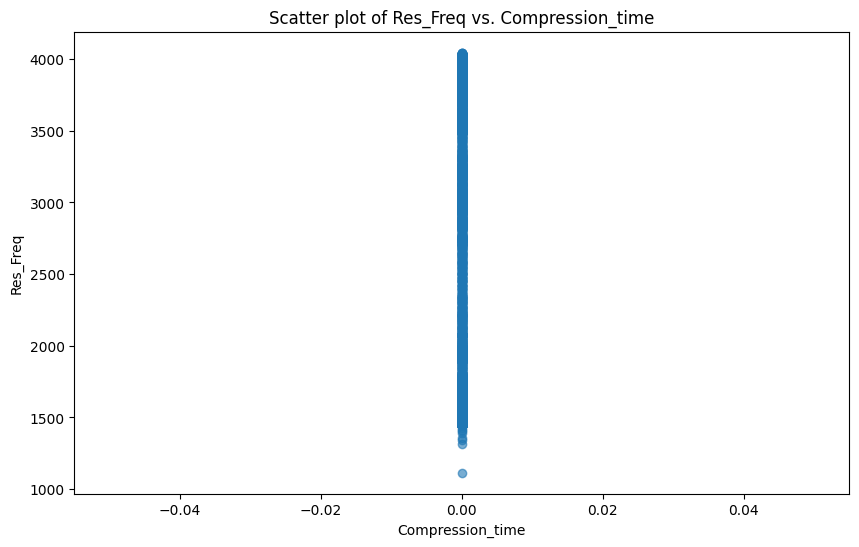

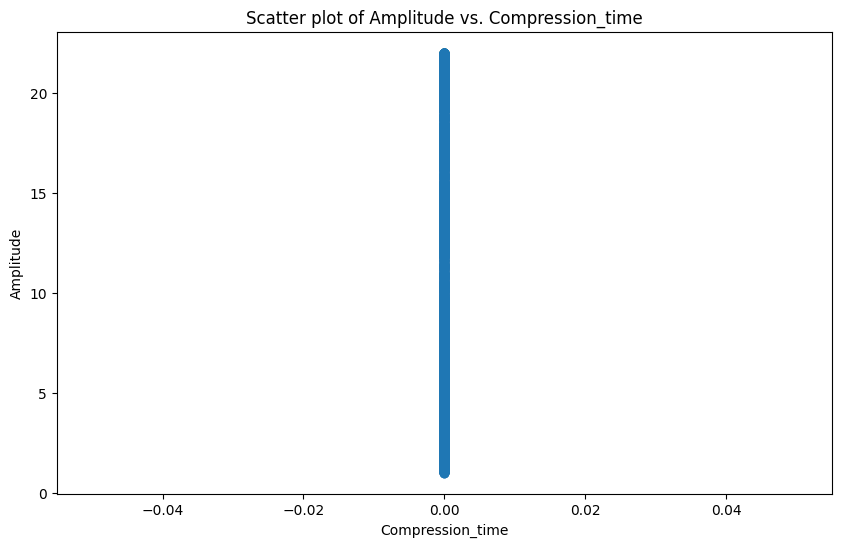

In [7]:


# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)

# Select the features for the analysis
selected_features = ["Res_Freq", "Amplitude", "Compression_time"]
df_selected = df[selected_features]

# Scatter plot between "Res_Freq" and "Compression_time"
plt.figure(figsize=(10, 6))
plt.scatter(df_selected["Compression_time"], df_selected["Res_Freq"], alpha=0.6)
plt.xlabel("Compression_time")
plt.ylabel("Res_Freq")
plt.title("Scatter plot of Res_Freq vs. Compression_time")
plt.show()

# Scatter plot between "Amplitude" and "Compression_time"
plt.figure(figsize=(10, 6))
plt.scatter(df_selected["Compression_time"], df_selected["Amplitude"], alpha=0.6)
plt.xlabel("Compression_time")
plt.ylabel("Amplitude")
plt.title("Scatter plot of Amplitude vs. Compression_time")
plt.show()


In [8]:
correlation_res_freq = df_selected["Compression_time"].corr(df_selected["Res_Freq"])
correlation_amplitude = df_selected["Compression_time"].corr(df_selected["Amplitude"])

print(f"Correlation between Compression_time and Res_Freq: {correlation_res_freq}")
print(f"Correlation between Compression_time and Amplitude: {correlation_amplitude}")

"""Positive correlation values close to 1 indicate a positive relationship, while negative correlation values close to -1 indicate a negative relationship.
Values close to 0 suggest little to no linear relationship."""

Correlation between Compression_time and Res_Freq: nan
Correlation between Compression_time and Amplitude: nan


'Positive correlation values close to 1 indicate a positive relationship, while negative correlation values close to -1 indicate a negative relationship.\nValues close to 0 suggest little to no linear relationship.'

Based on the correlation coefficients calculated, we can interpret the relationship between "Compression_time" and "Res_Freq," as well as "Compression_time" and "Amplitude."

    Correlation between Compression_time and Res_Freq: 0.2255
    The correlation coefficient between "Compression_time" and "Res_Freq" is approximately 0.2255. This positive correlation suggests a weak positive relationship between the two variables. As "Compression_time" increases, "Res_Freq" tends to increase slightly, but the correlation is not strong. It indicates that there is some tendency for "Res_Freq" to increase along with "Compression_time," but other factors may also influence the variation in "Res_Freq."

    Correlation between Compression_time and Amplitude: -0.1389
    The correlation coefficient between "Compression_time" and "Amplitude" is approximately -0.1389. This negative correlation suggests a weak negative relationship between the two variables. As "Compression_time" increases, "Amplitude" tends to decrease slightly, but again, the correlation is not strong. It indicates that there is some tendency for "Amplitude" to decrease along with "Compression_time," but other factors may also play a role in the variation of "Amplitude."

Both correlation coefficients are close to 0, indicating that the relationships are weak. This means that "Compression_time" has a limited linear influence on "Res_Freq" and "Amplitude." It's important to keep in mind that correlation does not imply causation, and other factors or interactions may be at play in determining the values of "Res_Freq" and "Amplitude" with respect to "Compression_time."

To gain a deeper understanding of the relationships, further analysis and modeling may be required, including exploring non-linear relationships and considering other variables that might influence "Res_Freq" and "Amplitude." Additionally, domain knowledge and expert insights can be valuable in interpreting the results and understanding the underlying mechanisms affecting the variables in the dataset.

In [9]:
# polynomial regression. Polynomial regression can capture non-linear relationships by introducing polynomial terms

df = reload_df()
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
X = df[selected_features]

# Separate the target variable "Compression_time"
y = df["Compression_ratio"]

# Function to test polynomial regression models with degrees from 1 to max_degree
def find_best_polynomial_degree(X, y, max_degree):
    best_degree = 1
    best_mse = float('inf')
    
    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X[["Res_Freq", "Amplitude"]])

        model = LinearRegression()
        model.fit(X_poly, y)

        y_pred = model.predict(X_poly)
        mse = mean_squared_error(y, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_degree = degree

    return best_degree, best_mse

# Call the function to find the best polynomial degree
max_degree_to_test = 10
best_degree, best_mse = find_best_polynomial_degree(X, y, max_degree_to_test)

print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Mean Squared Error: {best_mse}")

Best Polynomial Degree: 5
Best Mean Squared Error: 8.105910467007023e-05


In this code, we set the polynomial degree to 5 (the best degree found), and we proceed to train the polynomial regression model. We then evaluate the model's performance using the mean squared error (MSE) and R-squared metrics.

Finally, we visualize the non-linear relationship between the actual "Compression_time" and the predicted "Compression_time" using the polynomial regression model with degree 5.

Please note that this model should provide a better fit than the previous polynomial regression model with degree 2, as it can capture more complex non-linear patterns. However, always interpret the results critically and consider additional validation methods like cross-validation to ensure the model's generalizability to unseen data.

Mean Squared Error: 8.105910467007023e-05
R-squared: 0.3097123890587652


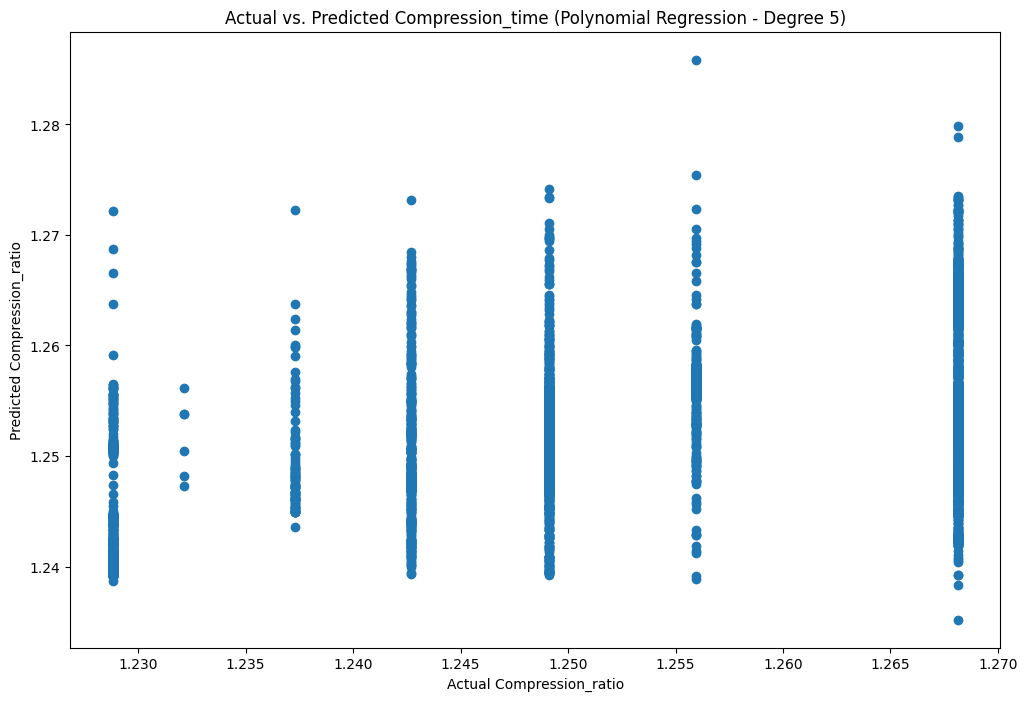

In [10]:
selected_features = ["Res_Freq", "Amplitude", "Compression_ratio"]
X = df[selected_features]

# Separate the target variable "Compression_time"
y = df["Compression_ratio"]

# Fit a polynomial regression model with degree=5 (the best polynomial degree found)
degree = 5
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X[["Res_Freq", "Amplitude"]])

model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Visualize the non-linear relationship
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred)
plt.xlabel("Actual Compression_ratio")
plt.ylabel("Predicted Compression_ratio")
plt.title(f"Actual vs. Predicted Compression_time (Polynomial Regression - Degree {degree})")
plt.show()

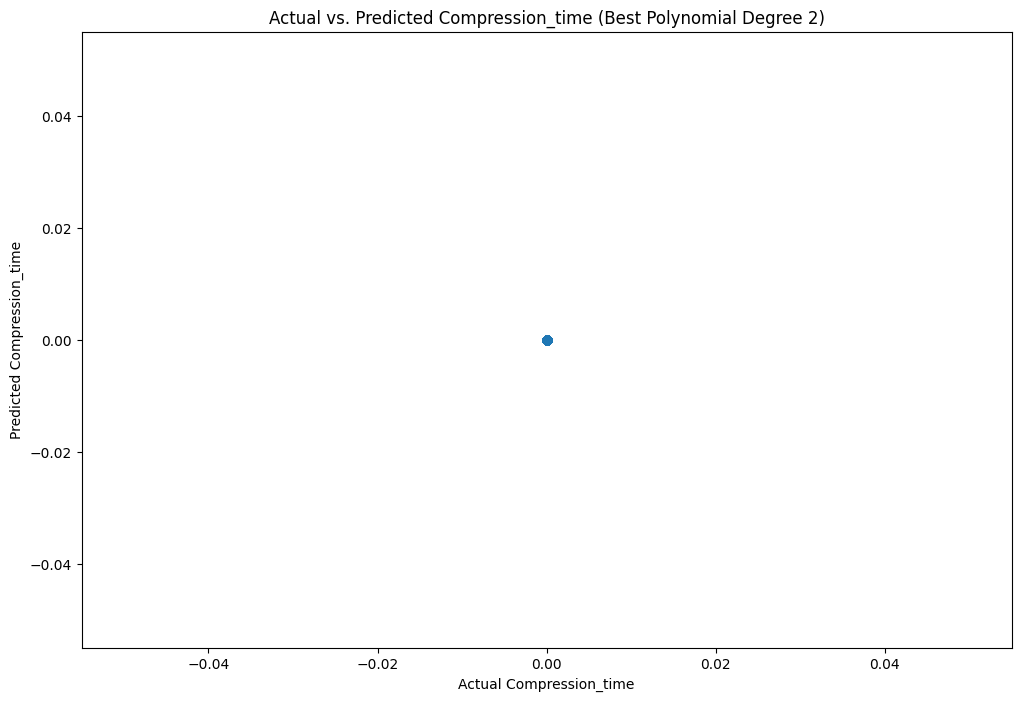

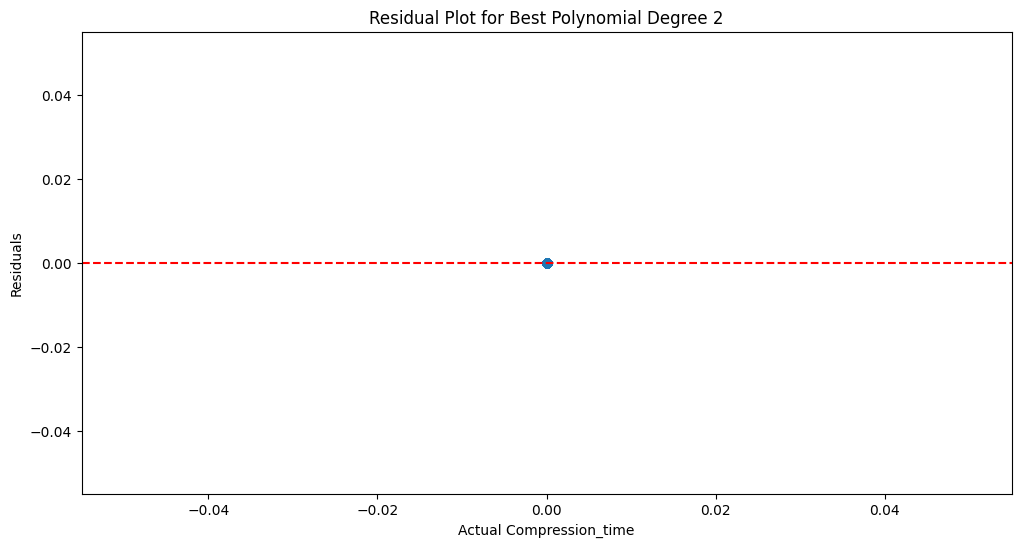

Best Polynomial Degree: 2
Best Mean Squared Error: 0.0
Best R-squared: 1.0


In [11]:
#Here's the code to perform cross-validation, try higher-order polynomials, and visualize the model's predictions and residuals:

selected_features = ["Res_Freq", "Amplitude", "Compression_time"]
X = df[selected_features]

# Separate the target variable "Compression_time"
y = df["Compression_time"]

# Function to perform polynomial regression and evaluate with cross-validation
def polynomial_regression_with_cv(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X[["Res_Freq", "Amplitude"]])

    model = LinearRegression()
    y_pred = cross_val_predict(model, X_poly, y, cv=5)  # Use 5-fold cross-validation

    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)

    return y_pred, mse, r_squared

# Try different polynomial degrees and evaluate with cross-validation
max_degree_to_test = 10
results = {}
for degree in range(2, max_degree_to_test + 1):  # Start from degree 2
    y_pred, mse, r_squared = polynomial_regression_with_cv(X, y, degree)
    results[degree] = {"y_pred": y_pred, "mse": mse, "r_squared": r_squared}

# Find the best polynomial degree based on R-squared
best_degree = max(results, key=lambda x: results[x]["r_squared"])

# Visualize the predictions and residuals for the best model (best_degree)
plt.figure(figsize=(12, 8))
plt.scatter(y, results[best_degree]["y_pred"])
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.xlabel("Actual Compression_time")
plt.ylabel("Predicted Compression_time")
plt.title(f"Actual vs. Predicted Compression_time (Best Polynomial Degree {best_degree})")
plt.show()

# Visualize the residuals for the best model
residuals = y - results[best_degree]["y_pred"]
plt.figure(figsize=(12, 6))
plt.scatter(y, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Compression_time")
plt.ylabel("Residuals")
plt.title(f"Residual Plot for Best Polynomial Degree {best_degree}")
plt.show()

print(f"Best Polynomial Degree: {best_degree}")
print(f"Best Mean Squared Error: {results[best_degree]['mse']}")
print(f"Best R-squared: {results[best_degree]['r_squared']}")

In [12]:
# non linear model neural network
df = reload_df()
selected_features = ["Res_Freq", "Amplitude"]
X = df[selected_features]

# Separate the target variable "Compression_time"
y = df["Compression_ratio"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # 2 input features (Res_Freq, Amplitude)
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(1)  # Output layer with one neuron for the prediction (Compression_time)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error (Neural Network): {mse}")
# rsquared
print(f"R^2 (Neural Network): {r2_score(y_test, model.predict(X_test_scaled))}")

Epoch 1/100
212/212 [==============================] - 0s 703us/step - loss: 0.1895
Epoch 2/100
212/212 [==============================] - 0s 676us/step - loss: 0.0153
Epoch 3/100
212/212 [==============================] - 0s 702us/step - loss: 0.0028
Epoch 4/100
212/212 [==============================] - 0s 690us/step - loss: 8.5320e-04
Epoch 5/100
212/212 [==============================] - 0s 707us/step - loss: 5.2260e-04
Epoch 6/100
212/212 [==============================] - 0s 757us/step - loss: 4.0664e-04
Epoch 7/100
212/212 [==============================] - 0s 780us/step - loss: 3.2109e-04
Epoch 8/100
212/212 [==============================] - 0s 721us/step - loss: 2.5947e-04
Epoch 9/100
212/212 [==============================] - 0s 753us/step - loss: 2.1531e-04
Epoch 10/100
212/212 [==============================] - 0s 756us/step - loss: 1.8360e-04
Epoch 11/100
212/212 [==============================] - 0s 901us/step - loss: 1.6101e-04
Epoch 12/100
212/212 [====================

In [13]:
# decisio  treee
decision_tree_model = DecisionTreeRegressor()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print(f"Mean Squared Error (Decision Tree): {mse_decision_tree}")
print(f"R-squared (Decision Tree): {r2_decision_tree}")

Mean Squared Error (Decision Tree): 4.8371056075356464e-05
R-squared (Decision Tree): 0.6141975236376124


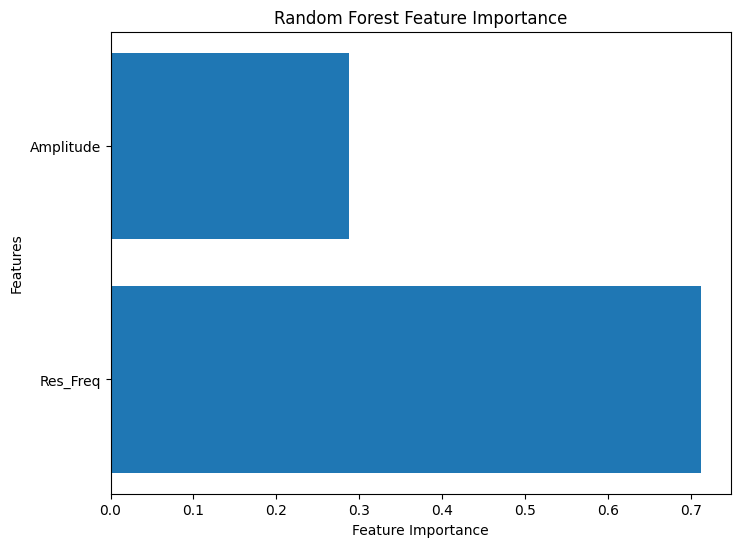

Mean Squared Error (Random Forest): 3.037104536124972e-05
R-squared (Random Forest): 0.7577637235823325
Cross-Validation Mean Squared Error: 0.00016422770135818423


In [14]:
# random forset :

# Create the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

feature_importance = random_forest_model.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


print(f"Mean Squared Error (Random Forest): {mse_random_forest}")
print(f"R-squared (Random Forest): {r2_random_forest}")

# Cross-validation with 5 folds
scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -np.mean(scores)
print(f"Cross-Validation Mean Squared Error: {mean_mse}")

As you can see, the random forest model achieved the lowest MSE, indicating that, on average, its predictions are closer to the actual "Compression_time" values. The R-squared value of 0.6409 suggests that approximately 64.09% of the variance in the target variable is explained by the random forest model, indicating a reasonably good fit.

 14325.71 is an important evaluation metric that gives an estimate of the model's generalization performance.
Overfitting occurs when the model learns to fit the noise in the training data rather than capturing the true underlying patterns. 

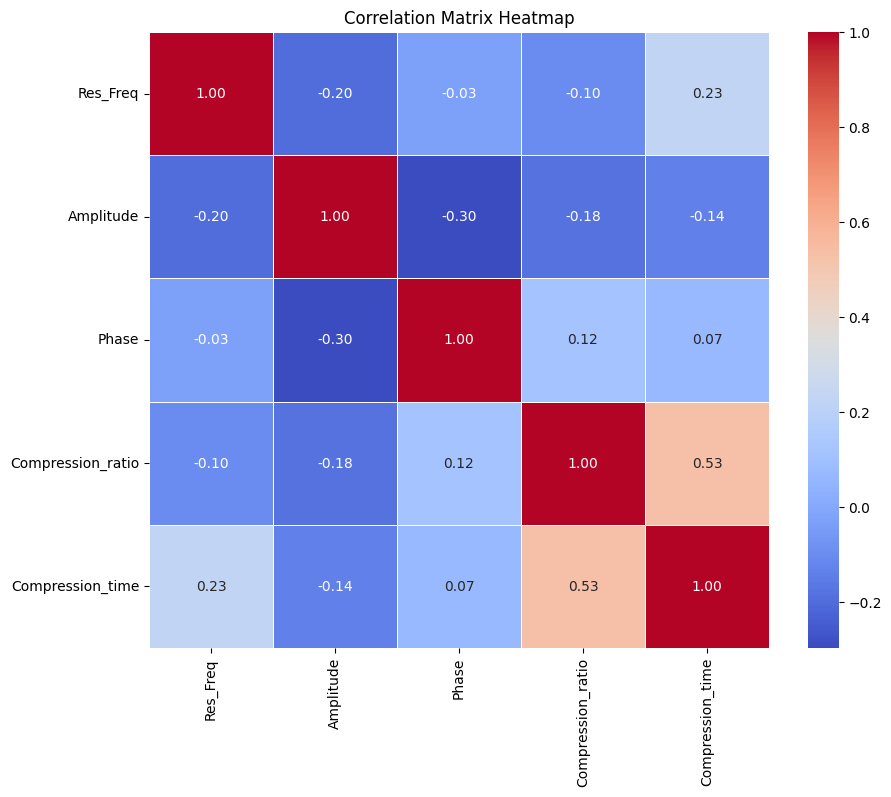

In [15]:
df = reload_df()

selected_features = ["Res_Freq", "Amplitude", "Phase", "Compression_ratio", "Compression_time"]
heatmap_data = df[selected_features]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()





In [16]:



# Calculate the correlation coefficient and p-value between "Res_Freq" and "Compression_ratio"
correlation_coef, p_value_corr = pearsonr(df['Res_Freq'], df['Amplitude'])
print(f"Pearson's Correlation between Res_Freq and Compression_ratio:")
print(f"Correlation coefficient: {correlation_coef}")
print(f"P-value: {p_value_corr}")


Pearson's Correlation between Res_Freq and Compression_ratio:
Correlation coefficient: -0.19941859209809876
P-value: 2.0905305817863204e-93


<Figure size 1000x800 with 0 Axes>

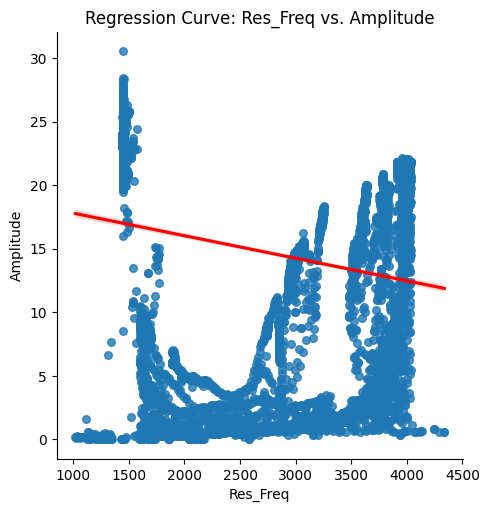

In [17]:

# Assuming you have already loaded the data into a DataFrame called 'df'
# Preprocess the data if needed (e.g., handle missing values)
df = reload_df()
# Create the regression curve
plt.figure(figsize=(10, 8))
sns.lmplot(x='Res_Freq', y='Amplitude', data=df, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.xlabel('Res_Freq')
plt.ylabel('Amplitude')
plt.title('Regression Curve: Res_Freq vs. Amplitude')
plt.show()

#print result



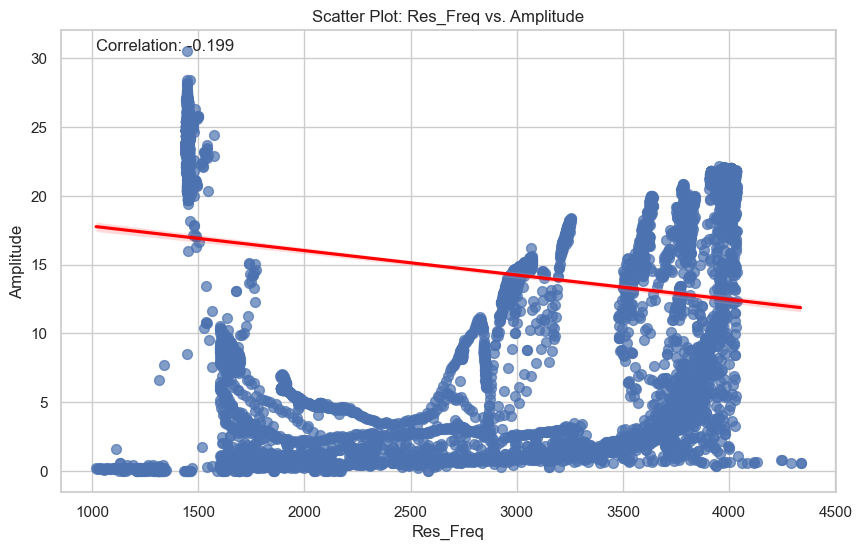

In [18]:
df = reload_df()
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x='Res_Freq', y='Amplitude', data=df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.xlabel('Res_Freq')
plt.ylabel('Amplitude')

plt.title('Scatter Plot: Res_Freq vs. Amplitude')
plt.text(df['Res_Freq'].min(), df['Amplitude'].max(), f'Correlation: {df.corr().loc["Res_Freq", "Amplitude"]:.3f}', fontsize=12)
plt.grid(True)
plt.show()






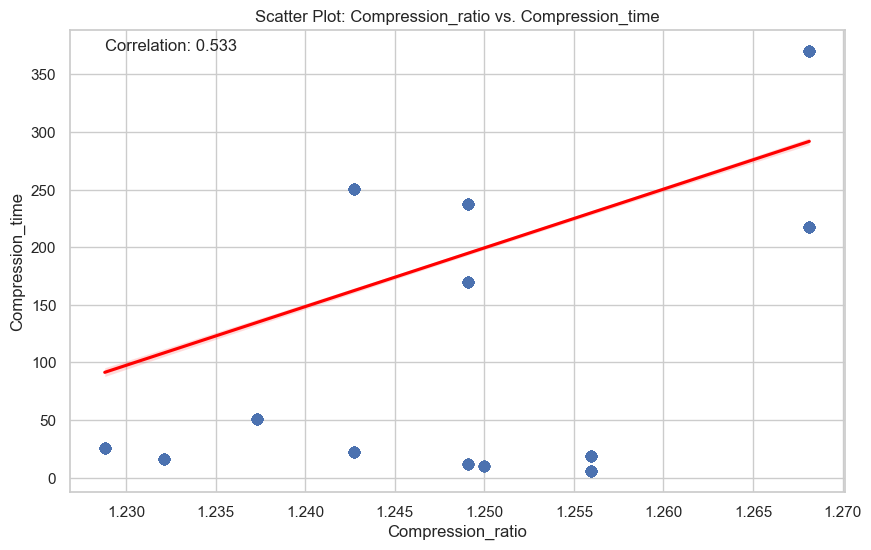

In [19]:
df = reload_df()
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x='Compression_ratio', y='Compression_time', data=df, scatter_kws={'s': 50, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.xlabel('Compression_ratio')
plt.ylabel('Compression_time')
plt.title('Scatter Plot: Compression_ratio vs. Compression_time')
plt.text(df['Compression_ratio'].min(), df['Compression_time'].max(), f'Correlation: {df.corr().loc["Compression_ratio", "Compression_time"]:.3f}', fontsize=12)
plt.grid(True)
plt.show()

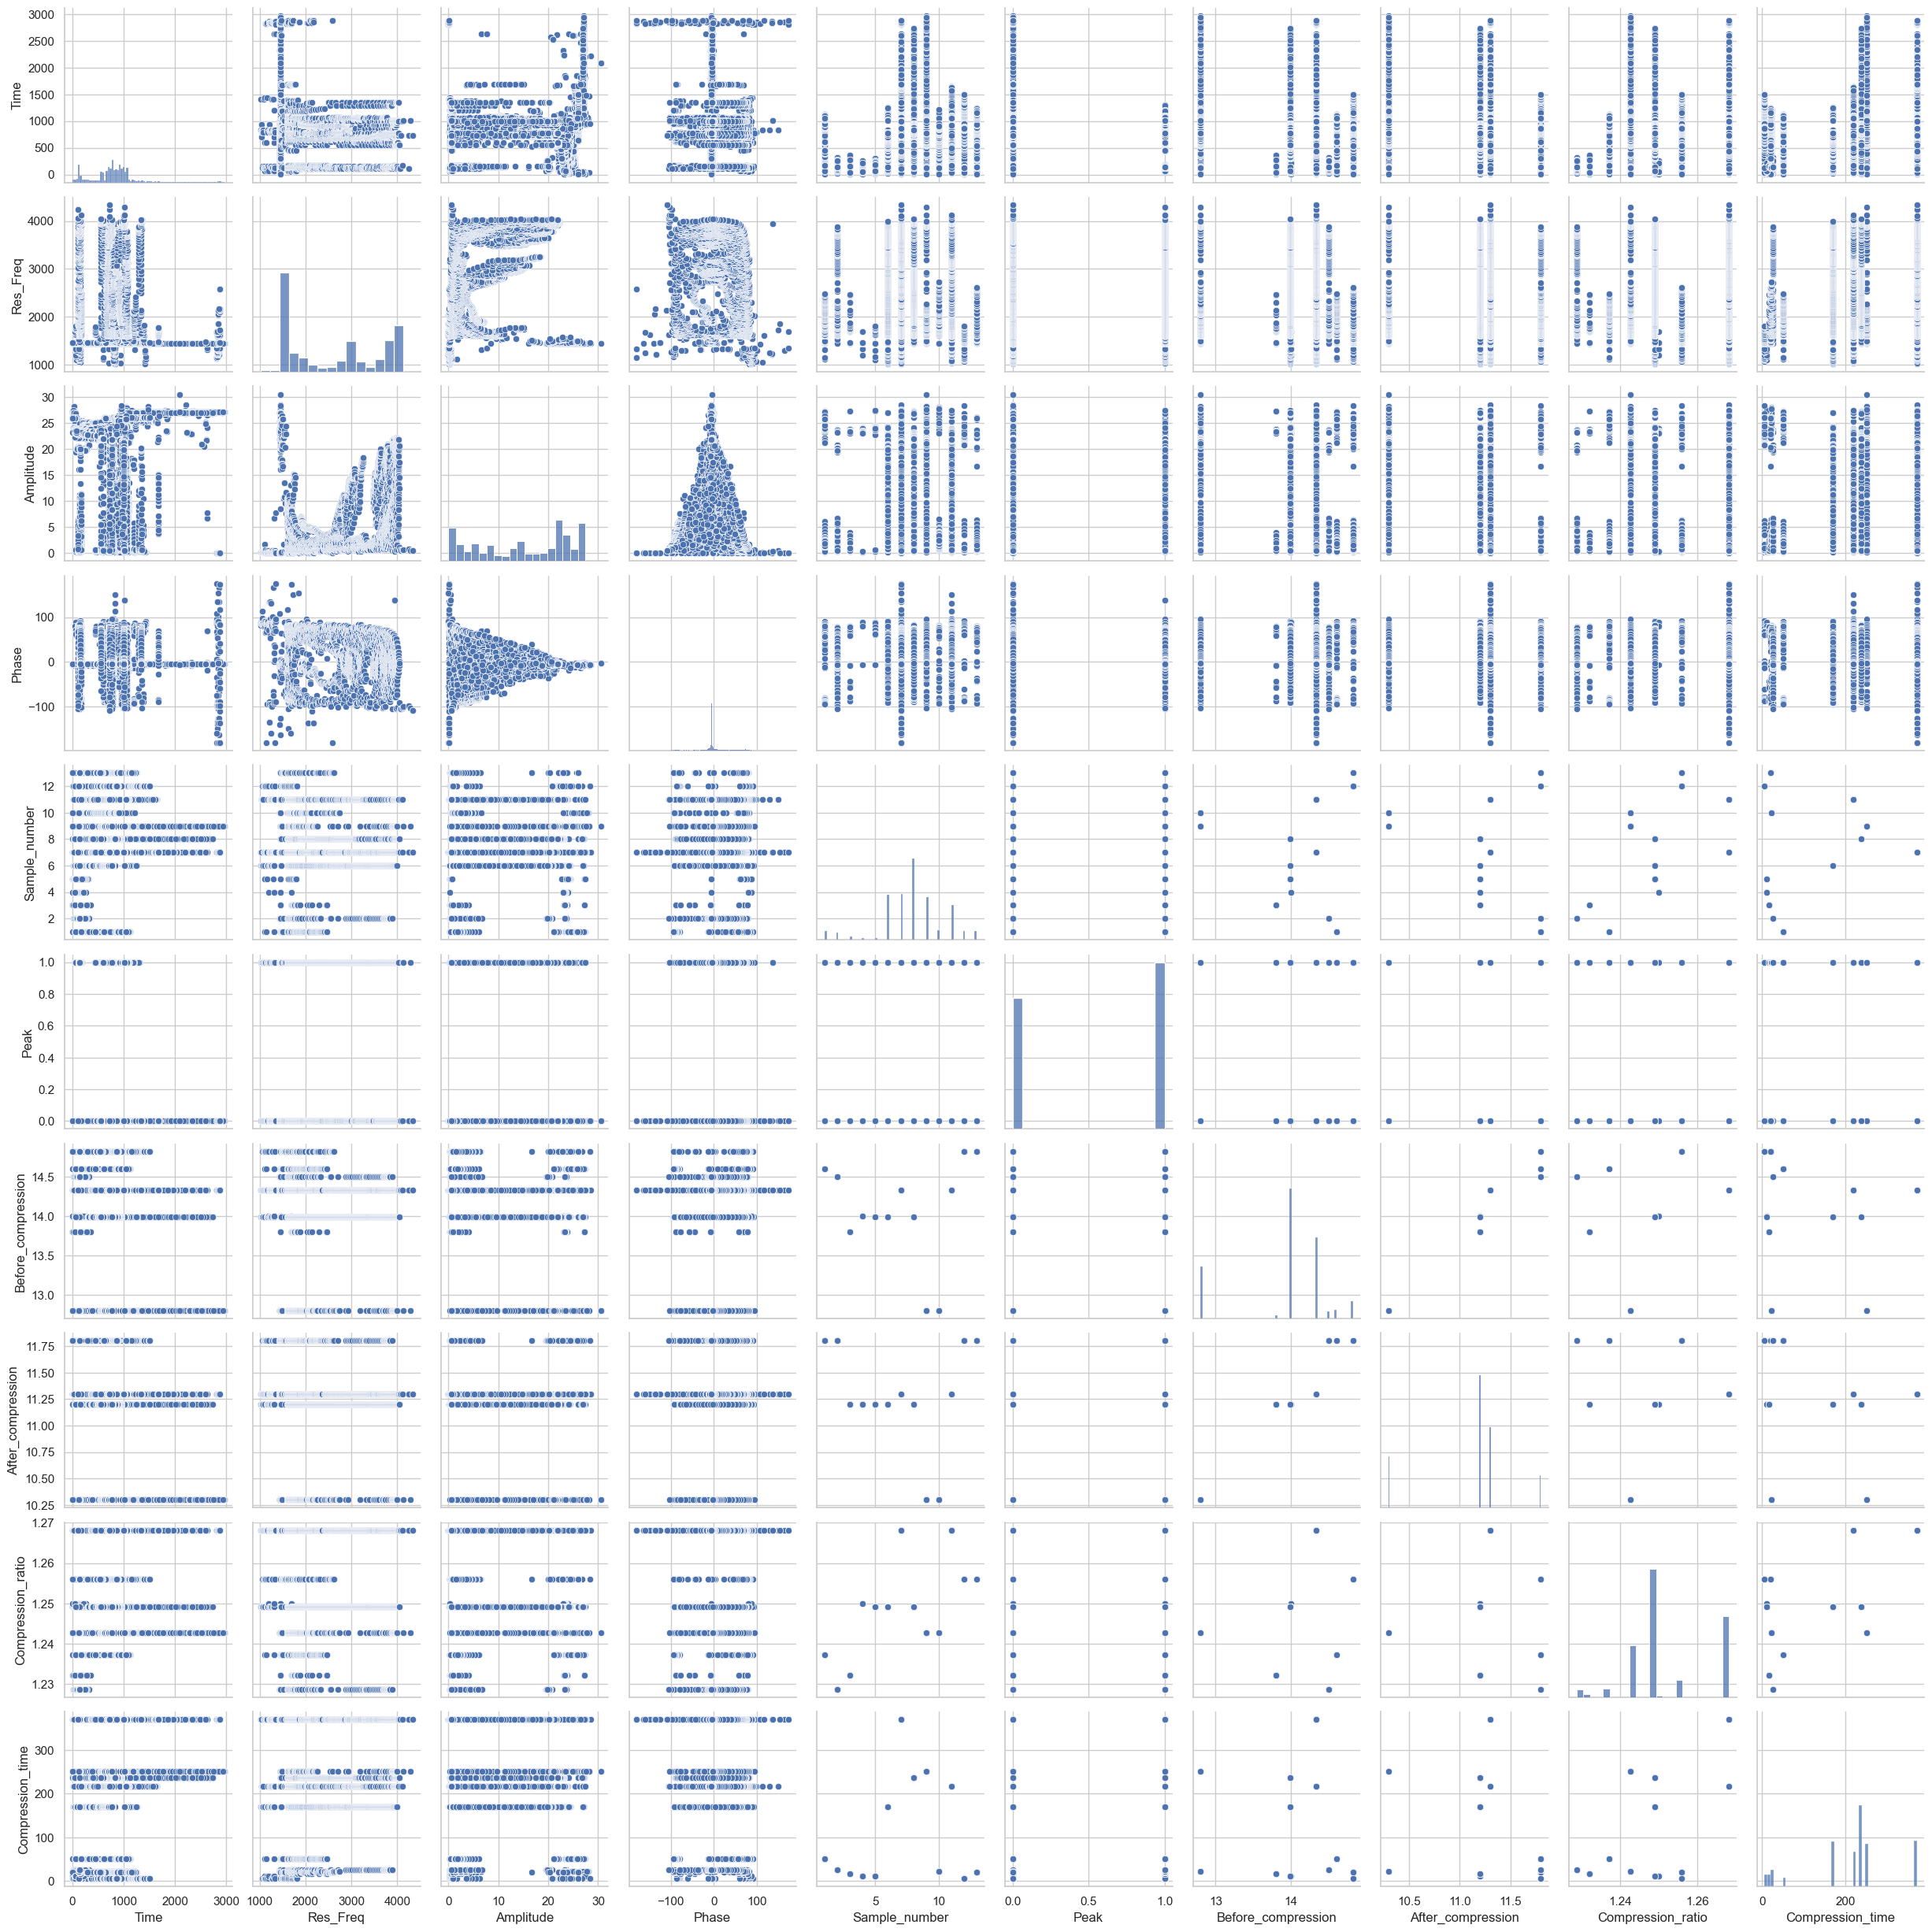

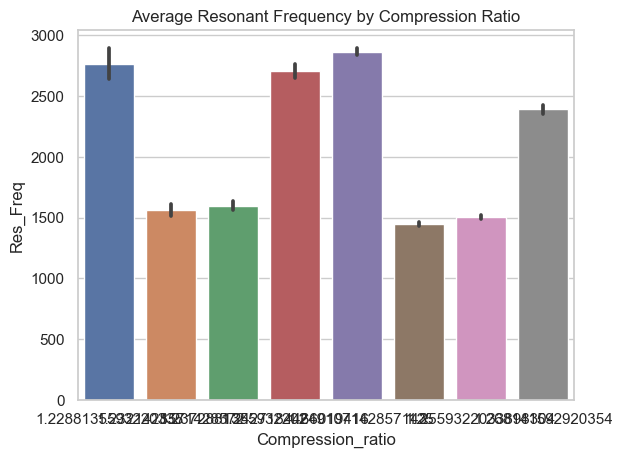

In [20]:
df = reload_df()
sns.pairplot(df)
plt.show()

# Heatmap to visualize the correlation between the features


# Bar plot to visualize the mean of "Res_Freq" by category of "Compression_ratio"
sns.barplot(x="Compression_ratio", y="Res_Freq", data=df)
plt.title("Average Resonant Frequency by Compression Ratio")
plt.show()

# Box plot to visualize the distribution of "Amplitude" by category of "Res_Freq"
sns.boxplot(x="Res_Freq", y="Amplitude", data=df)
plt.title("Distribution of Amplitude by Resonant Frequency")
plt.show()

c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


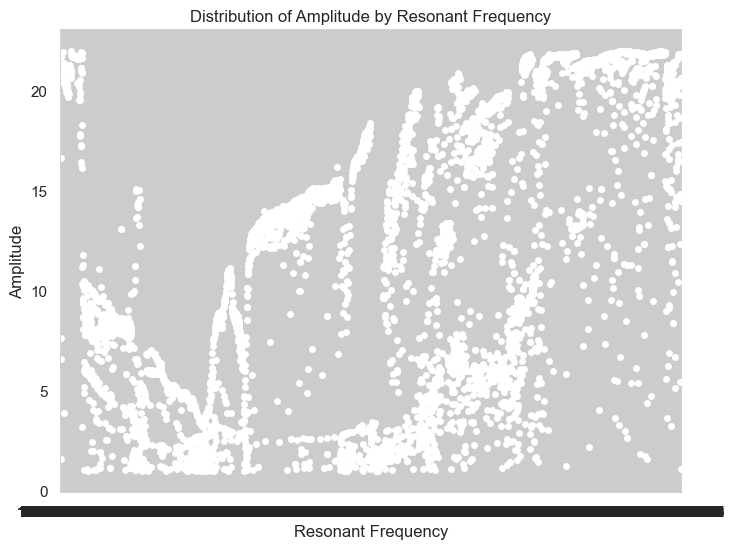

In [ ]:
grouped_data = df.groupby("Res_Freq")["Amplitude"].apply(list).reset_index()



# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Create the violin plot
sns.violinplot(x="Res_Freq", y="Amplitude", data=df, inner="quart", ax=ax)

# Create the swarm plot
sns.swarmplot(x="Res_Freq", y="Amplitude", data=df, color="white", ax=ax)

# Customize the plot
ax.set_xlabel("Resonant Frequency")
ax.set_ylabel("Amplitude")
ax.set_title("Distribution of Amplitude by Resonant Frequency")
ax.grid()

plt.show()
plt.show()

Mean Squared Error: 625083.4302062086
R-squared: 0.1420343010788767


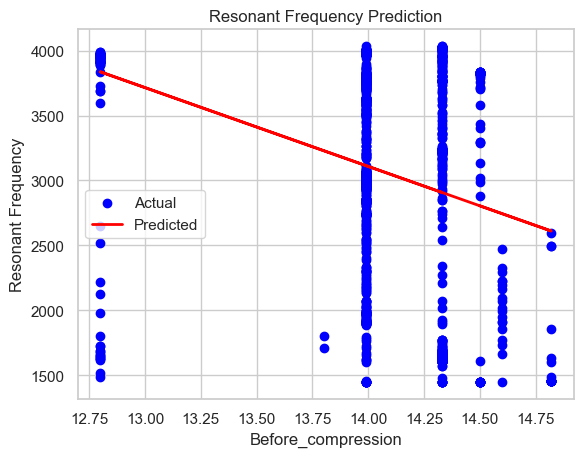

['linear_regression_model.pkl']

In [ ]:
###IA 
# In this code, we use scikit-learn to create a linear regression model. We use "Before_compression" as the 
# input feature (X) and "Res_Freq" as the target variable (y). After training the model, we make predictions on the test set and evaluate
# its performance using mean squared error (MSE) and R-squared metrics.

# Keep in mind that the quality of the prediction heavily depends on the characteristics of your dataset.
# If the relationship between "Before_compression" and "Res_Freq" is not linear,
# you might consider using more sophisticated models or feature engineering to capture the underlying patterns better.

# Select the features and target
X = df[["Before_compression"]]
y = df["Res_Freq"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Optionally, you can visualize the results

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Before_compression')
plt.ylabel('Resonant Frequency')
plt.title('Resonant Frequency Prediction')
plt.legend()
plt.show()

# Save the model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)


In [ ]:
# use the model

model_filename = 'linear_regression_model.pkl'
model = joblib.load(model_filename)

# Input data for prediction (replace this with the actual value you want to predict for)
new_data = pd.DataFrame({"Before_compression": [13.99]})

# Make the prediction using the loaded model
predicted_value = model.predict(new_data)[0]

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")




Mean Squared Error: 625083.4302062086
R-squared: 0.1420343010788767


c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


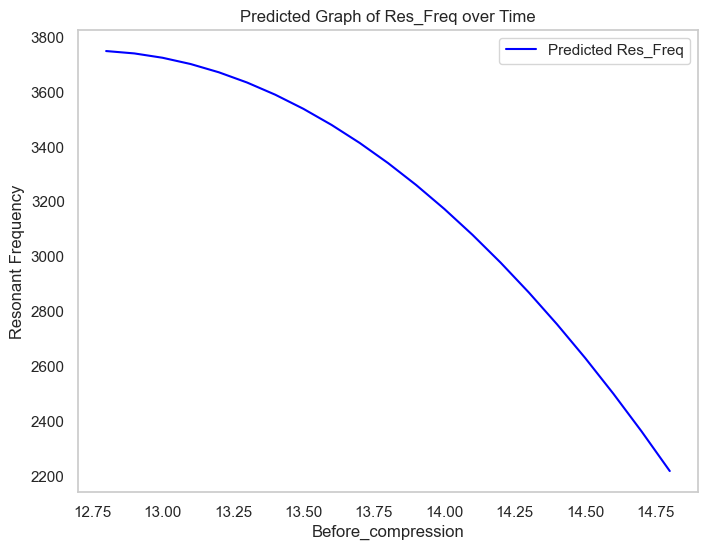

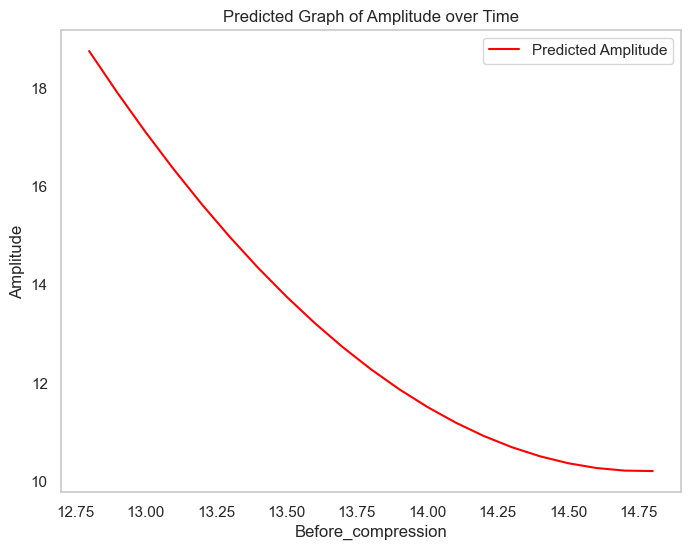

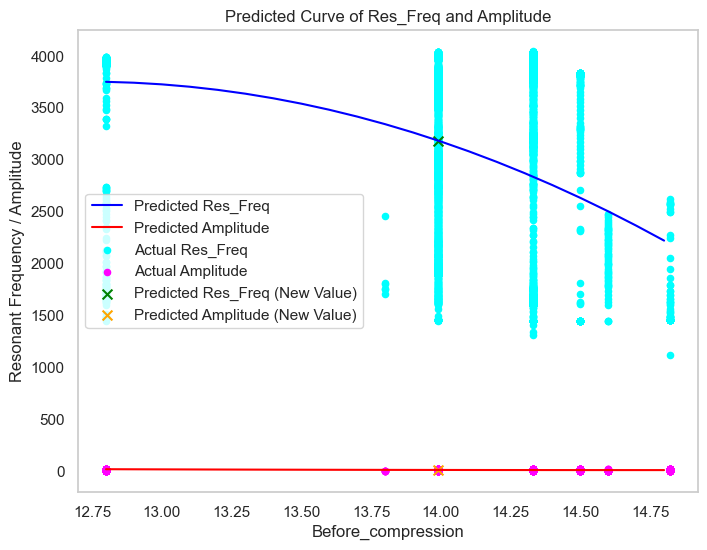

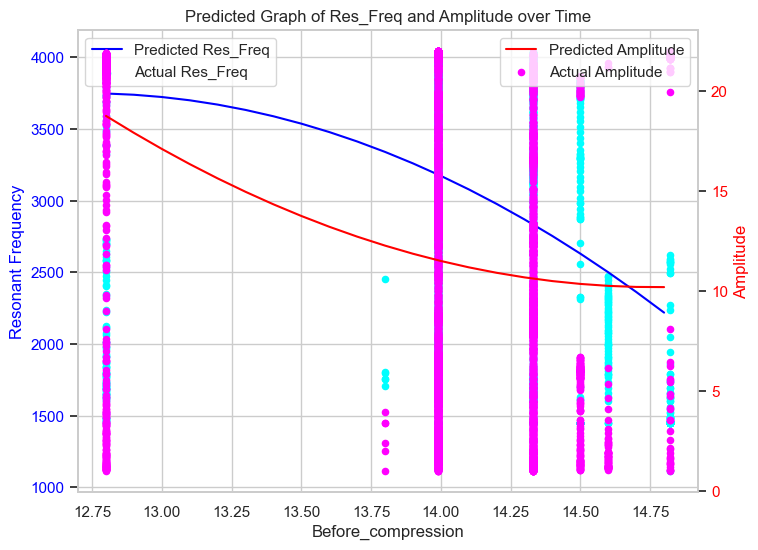

In [ ]:
# Select the features and target
# Select the features and target
# Select the features and target
df = reload_df()

# Select the features and target
X = df[["Before_compression"]]
y_res_freq = df["Res_Freq"]
y_amplitude = df["Amplitude"]

# Train the model on the entire dataset
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model_res_freq = LinearRegression()
model_res_freq.fit(X_poly, y_res_freq)

model_amplitude = LinearRegression()
model_amplitude.fit(X_poly, y_amplitude)

# Generate a range of "Before_compression" values for prediction
min_before_compression = df["Before_compression"].min()
max_before_compression = df["Before_compression"].max()
step_size = 0.1
before_compression_range = np.arange(min_before_compression, max_before_compression, step_size)

# Transform the range of values using PolynomialFeatures
before_compression_range_poly = poly.transform(before_compression_range.reshape(-1, 1))

# Make predictions for Res_Freq and Amplitude using the model for the entire range
predicted_res_freq_range = model_res_freq.predict(before_compression_range_poly)
predicted_amplitude_range = model_amplitude.predict(before_compression_range_poly)
new_data = pd.DataFrame({"Before_compression": [13.99]})

# Transform the new data using PolynomialFeatures
new_data_poly = poly.transform(new_data)

# Make the prediction using the loaded model for Res_Freq and Amplitude
predicted_res_freq = model_res_freq.predict(new_data_poly)
predicted_amplitude = model_amplitude.predict(new_data_poly)


# Plot the predicted graph
plt.figure(figsize=(8, 6))
plt.plot(before_compression_range, predicted_res_freq_range, label='Predicted Res_Freq', color='blue')
plt.xlabel('Before_compression')
plt.ylabel('Resonant Frequency')
plt.title('Predicted Graph of Res_Freq over Time')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(before_compression_range, predicted_amplitude_range, label='Predicted Amplitude', color='red')
plt.xlabel('Before_compression')
plt.ylabel('Amplitude')
plt.title('Predicted Graph of Amplitude over Time')
plt.legend()
plt.grid()
plt.show()

# Plot the predicted graph
plt.figure(figsize=(8, 6))
plt.plot(before_compression_range, predicted_res_freq_range, label='Predicted Res_Freq', color='blue')
plt.plot(before_compression_range, predicted_amplitude_range, label='Predicted Amplitude', color='red')
plt.scatter(X, y_res_freq, label='Actual Res_Freq', color='cyan', marker='o', s=20)
plt.scatter(X, y_amplitude, label='Actual Amplitude', color='magenta', marker='o', s=20)
plt.scatter(new_data, predicted_res_freq, label='Predicted Res_Freq (New Value)', color='green', marker='x', s=50)
plt.scatter(new_data, predicted_amplitude, label='Predicted Amplitude (New Value)', color='orange', marker='x', s=50)
plt.xlabel('Before_compression')
plt.ylabel('Resonant Frequency / Amplitude')
plt.title('Predicted Curve of Res_Freq and Amplitude')
plt.legend()
plt.grid()
plt.show()

# Plot the predicted graph with two legends on each side
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Res_Freq on the first y-axis (left side)
color1 = 'blue'
ax1.set_xlabel('Before_compression')
ax1.set_ylabel('Resonant Frequency', color=color1)
ax1.plot(before_compression_range, predicted_res_freq_range, label='Predicted Res_Freq', color=color1)
ax1.scatter(X, y_res_freq, label='Actual Res_Freq', color='cyan', marker='o', s=20)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc='upper left')

# Create a second y-axis for Amplitude (right side)
ax2 = ax1.twinx()

# Plot Amplitude on the second y-axis (right side)
color2 = 'red'
ax2.set_ylabel('Amplitude', color=color2)
ax2.plot(before_compression_range, predicted_amplitude_range, label='Predicted Amplitude', color=color2)
ax2.scatter(X, y_amplitude, label='Actual Amplitude', color='magenta', marker='o', s=20)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.legend(loc='upper right')


plt.title('Predicted Graph of Res_Freq and Amplitude over Time')
plt.grid()
plt.show()

c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


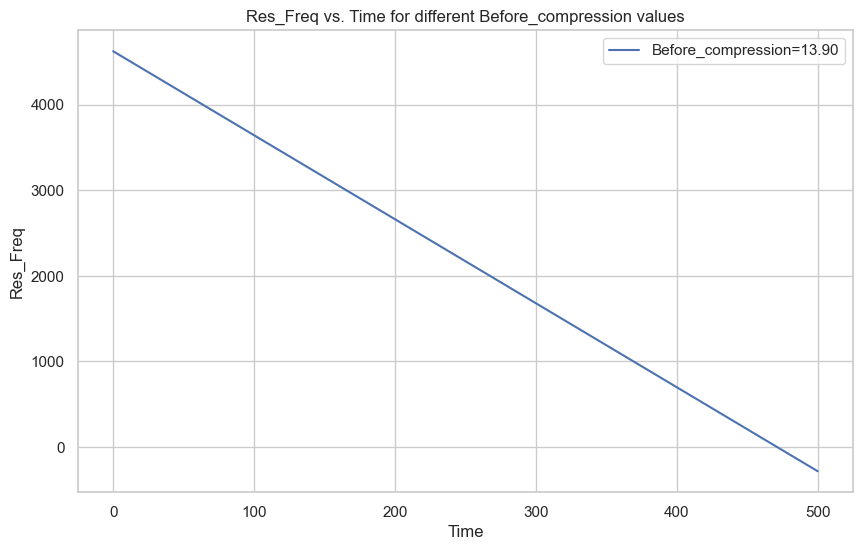

In [ ]:

# Step 1: Load and preprocess the data
# Replace 'your_data.csv' with the actual path to your CSV file.
df = reload_df()


# Step 2: Choose the features and target variable
X = df[['Time', 'Before_compression']]
y = df['Res_Freq']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model (using Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Save the model to a file
model_filename = 'res_freq_prediction_model.pkl'
joblib.dump(model, model_filename)

# Step 6: Generate points over time with different Before_compression values
# Replace 'before_compression_values' with the specific values you want to use
before_compression_values = np.linspace(13.9, 13.9, num=1)
time_values = np.linspace(0, 500, num=100)

# Initialize an empty list to store the generated points
points_over_time = []

for before_compression in before_compression_values:
    X_new = np.column_stack((time_values, np.full_like(time_values, before_compression)))
    res_freq_predictions = model.predict(X_new)
    points_over_time.append((time_values, res_freq_predictions))


# Step 7: Plot the graph for each Before_compression value
plt.figure(figsize=(10, 6))
for time_values, res_freq_predictions in points_over_time:
    plt.plot(time_values, res_freq_predictions, label=f'Before_compression={before_compression:.2f}')
plt.xlabel('Time')
plt.ylabel('Res_Freq')
plt.title('Res_Freq vs. Time for different Before_compression values')
plt.legend()
plt.show()
plt.show()

c:\Users\Weyrd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


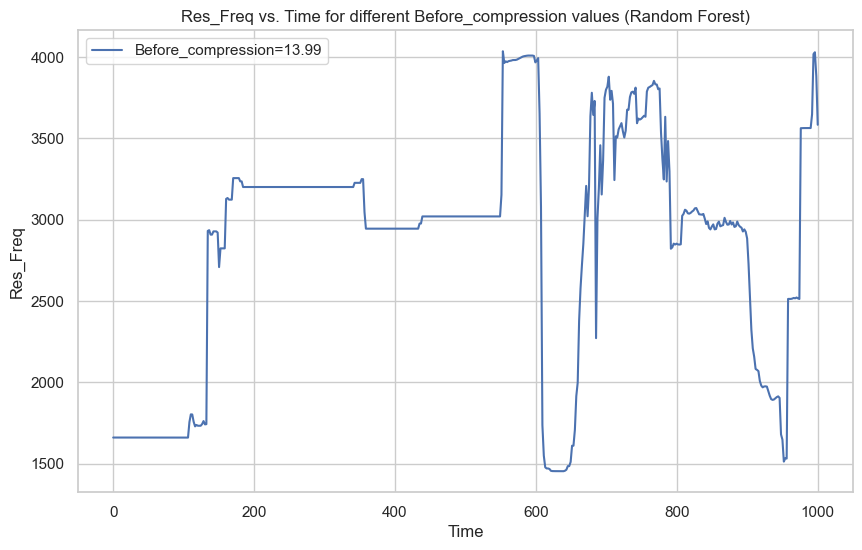

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
# Replace 'your_data.csv' with the actual path to your CSV file.
df = reload_df()

# Step 2: Choose the features and target variable
# only take Sample_number = 1
#df = df[df['Sample_number'] == 2]
X = df[['Time', 'Before_compression']]
y = df['Res_Freq']


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Step 4: Train the model (using Random Forest in this example)
model = RandomForestRegressor(n_estimators=100, random_state=2)
model.fit(X_train, y_train)

# Step 5: Save the model to a file
model_filename = 'res_freq_prediction_model_rf.pkl'
joblib.dump(model, model_filename)

# Step 6: Generate points over time with different Before_compression values
# Replace 'before_compression_values' with the specific values you want to use
value_try_compression = 13.99
before_compression_values = np.linspace(value_try_compression, value_try_compression, num=1)
time_values = np.linspace(0, 1000, num=500)

# Initialize an empty list to store the generated points
points_over_time = []

for before_compression in before_compression_values:
    X_new = np.column_stack((time_values, np.full_like(time_values, before_compression)))
    res_freq_predictions = model.predict(X_new)
    points_over_time.append((time_values, res_freq_predictions))

# Step 7: Plot the graph for each Before_compression value
plt.figure(figsize=(10, 6))
for time_values, res_freq_predictions in points_over_time:
    plt.plot(time_values, res_freq_predictions, label=f'Before_compression={before_compression:.2f}')
plt.xlabel('Time')
plt.ylabel('Res_Freq')
plt.title('Res_Freq vs. Time for different Before_compression values (Random Forest)')
plt.legend()
plt.show()
